### Importing needed libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

### Reading the dataset

In [2]:
ratings = pd.read_csv('./dataset/ratings.csv')
movies = pd.read_csv('./dataset/movies.csv')
links = pd.read_csv('./dataset/links.csv')

In [3]:
ratings.head()

,Unnamed: 0,userId,movieId,rating,timestamp
0,254,3,1,4.0,1439472215
1,255,3,29,4.5,1484754967
2,256,3,32,4.5,1439474635
3,257,3,50,5.0,1439474391
4,258,3,111,4.0,1484753849


contains ratings of different movies by all users

In [4]:
movies.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


contains movie titles and genres 

In [5]:
links.head()

,movieId,imdbId,tmdbId
0,1,114709,862.0
1,2,113497,8844.0
2,3,113228,15602.0
3,4,114885,31357.0
4,5,113041,11862.0


contains the imdb and tbdb id of the movies (might be useful at a later stage)

In [6]:
ratings = ratings.merge(movies, on='movieId')

In [7]:
ratings = ratings.merge(links, on='movieId')

In [8]:
ratings.head()

,Unnamed: 0,userId,movieId,rating,timestamp,title,genres,imdbId,tmdbId
0,254,3,1,4.0,1439472215,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,114709,862.0
1,1714,12,1,4.0,1167582601,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,114709,862.0
2,2450,13,1,4.0,1265223970,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,114709,862.0
3,5858,43,1,4.0,1170491388,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,114709,862.0
4,6921,57,1,4.0,1142403282,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,114709,862.0


In [9]:
movie_links = movies.merge(links,on='movieId')

In [10]:
movie_links.head()

,movieId,title,genres,imdbId,tmdbId
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,114709,862.0
1,2,Jumanji (1995),Adventure|Children|Fantasy,113497,8844.0
2,3,Grumpier Old Men (1995),Comedy|Romance,113228,15602.0
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance,114885,31357.0
4,5,Father of the Bride Part II (1995),Comedy,113041,11862.0


In [11]:
del movies
del links

### EDA

In [12]:
ratings.groupby('title')['rating'].mean().sort_values(ascending=False)

title
Deconstructing the Beatles' White Album (2016)    5.0
New Order (2012)                                  5.0
Snow White (1987)                                 5.0
Psychophony (2013)                                5.0
African Treasure (1952)                           5.0
                                                 ... 
Caro Gorbaciov (1988)                             0.5
Water Boyy (2015)                                 0.5
Down and Out with the Dolls (2001)                0.5
Oblivion 2: Backlash (1996)                       0.5
Ducoboo 2: Crazy Vacation (2012)                  0.5
Name: rating, Length: 58098, dtype: float64

In [13]:
ratings.groupby('title')['rating'].count().sort_values(ascending=False)

title
Matrix, The (1999)                           17935
Forrest Gump (1994)                          17749
Pulp Fiction (1994)                          17225
Star Wars: Episode IV - A New Hope (1977)    16929
Silence of the Lambs, The (1991)             16697
                                             ...  
Of Mind and Music (2014)                         1
Off the Mark (1987)                              1
Off the Minnesota Strip (1980)                   1
Offending Women Is Not Recommended (2000)        1
줄탁동시 (2012)                                      1
Name: rating, Length: 58098, dtype: int64

In [14]:
movie_ratings = pd.DataFrame(ratings.groupby('title')['rating'].mean())

In [15]:
movie_ratings['num_of_ratings'] = ratings.groupby('title')['rating'].count()

In [16]:
movie_ratings.head()

,rating,num_of_ratings
title,,
"""BLOW THE NIGHT!"" Let's Spend the Night Together (1983)",3.000000,1
"""Great Performances"" Cats (1998)",3.038462,65
#1 Cheerleader Camp (2010),1.714286,7
#Captured (2017),3.750000,2
#Female Pleasure (2018),3.750000,2


<Axes: >

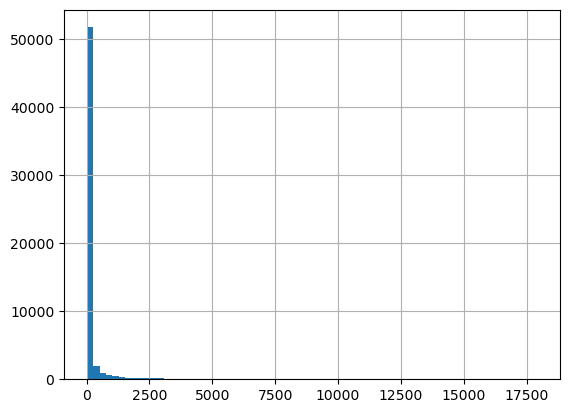

In [17]:
movie_ratings['num_of_ratings'].hist(bins=70)

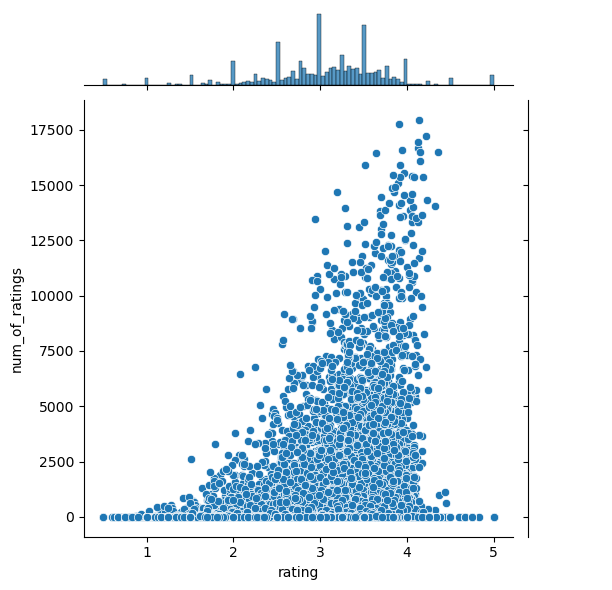

In [18]:
sns.jointplot(data=movie_ratings,x='rating',y='num_of_ratings')

In [19]:
print(f'''mean of num_of_ratings - {movie_ratings['num_of_ratings'].mean()}
median of num_of_ratings - {movie_ratings['num_of_ratings'].median()}''')

mean of num_of_ratings - 224.39102895108266
median of num_of_ratings - 5.0


In [20]:
print(ratings.duplicated(subset=['userId', 'title']).sum())  

560


In [21]:
ratings = ratings.drop_duplicates(subset=['userId', 'title'])

removed duplicate entries

### Building the Recommender System

#### Or load the matrix below to save time 

In [22]:
ratings['userId'] = ratings['userId'].astype('int32')
ratings['rating'] = ratings['rating'].astype('float32')

downgraded datatypes to help manage memory better

In [23]:
ratings_matrix = ratings.pivot_table(index='userId',columns='title',values='rating')

In [24]:
ratings_matrix

title,"""BLOW THE NIGHT!"" Let's Spend the Night Together (1983)","""Great Performances"" Cats (1998)",#1 Cheerleader Camp (2010),#Captured (2017),#Female Pleasure (2018),#FollowMe (2019),#Horror (2015),#Lucky Number (2015),#SCREAMERS (2016),#SquadGoals (2018),...,ארבינקא (1967),أهواك (2015),به نام پدر,काशी - In Search of Ganga (2018),‘Rameau’s Nephew’ by Diderot (Thanx to Dennis Young) by Wilma Schoen (1974),…And the Fifth Horseman Is Fear (1965),キサラギ (2007),チェブラーシカ (2010),貞子3D (2012),줄탁동시 (2012)
userId,,,,,,,,,,,,,,,,,,,,,
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
12,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
13,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
19,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
23,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
162519,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
162521,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
162529,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


created a 2-D matrix of user ratings for all movies

#### Saving the matrix

In [ ]:
'''
This is to close any open tables
USE this when you encounter error that "the h5 is already open" while running the cell below
'''
import tables
tables.file._open_files.close_all()

In [26]:
num_parts = 3
chunk_size = len(ratings_matrix) // num_parts

for part_num in range(num_parts):
    start_idx = part_num * chunk_size
    end_idx = start_idx + chunk_size if part_num < num_parts - 1 else None
    part_df = ratings_matrix.iloc[start_idx:end_idx]
    part_df.to_hdf(f'./dataset/ratings_matrix_{part_num + 1}.h5', key='data', mode='w')

#### Loading the matrix

In [34]:
dfs = []
for part_num in range(3):  
    file_path = f'./dataset/ratings_matrix_{part_num + 1}.h5'
    part_df = pd.read_hdf(file_path, key='data')
    dfs.append(part_df)

ratings_matrix = pd.concat(dfs)

### Recommending Movies

In [36]:
def recommend(movie):
    movie_user_ratings = ratings_matrix[movie] 
    similar_to_movie = ratings_matrix.corrwith(movie_user_ratings)
    corr_movie = pd.DataFrame(similar_to_movie,columns=['correlation'])
    corr_movie.dropna(inplace=True)
    corr_movie = corr_movie.join(movie_ratings['num_of_ratings'])
    corr_movie = corr_movie[corr_movie['num_of_ratings']>350].sort_values('correlation',ascending=False)
    recommended_movie_list = []
    if movie in list(corr_movie[0:5].index):
        i=1
    for x in list(corr_movie[i+0:i+5].index):
        recommended_movie_list.append(x)
    print(f'If you liked the movie {movie}, You will also like: ')
    for i in recommended_movie_list:
        print(i)

In [37]:
recommend('Iron Man (2008)')

If you liked the movie Iron Man (2008), You will also like: 
Iron Man 2 (2010)
Avengers, The (2012)
Iron Man 3 (2013)
Avengers: Age of Ultron (2015)
Captain America: The Winter Soldier (2014)


In [38]:
recommend('Harry Potter and the Prisoner of Azkaban (2004)')

If you liked the movie Harry Potter and the Prisoner of Azkaban (2004), You will also like: 
Harry Potter and the Goblet of Fire (2005)
Harry Potter and the Order of the Phoenix (2007)
Harry Potter and the Deathly Hallows: Part 2 (2011)
Harry Potter and the Half-Blood Prince (2009)
Harry Potter and the Chamber of Secrets (2002)


In [39]:
recommend('Toy Story (1995)')

If you liked the movie Toy Story (1995), You will also like: 
Toy Story 2 (1999)
Toy Story 3 (2010)
Bug's Life, A (1998)
Monsters, Inc. (2001)
Finding Nemo (2003)


In [40]:
recommend('Godfather, The (1972)')

If you liked the movie Godfather, The (1972), You will also like: 
Godfather: Part II, The (1974)
Goodfellas (1990)
Safety Last! (1923)
Raging Bull (1980)
Taxi Driver (1976)


In [41]:
recommend('Predator (1987)')

If you liked the movie Predator (1987), You will also like: 
Commando (1985)
Predator 2 (1990)
Conan the Barbarian (1982)
Terminator, The (1984)
Terminator 2: Judgment Day (1991)
